In [41]:
from google.colab import drive 
drive.mount('/content/drive/') 


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [51]:
import imageio
import tensorflow as tf
from skimage.transform import resize
from skimage import io
path='/content/drive/MyDrive/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/test/Glaucoma_Negative/001.jpg'
HEIGHT=256
WIDTH=256
tmp_img=io.imread(path)
print(tmp_img.shape[1]/2)
mid=1536
temp_img = resize(tmp_img[:,mid-1024:mid+1024,:], (HEIGHT,WIDTH, 3))
print(temp_img.shape)
temp_img = temp_img.reshape(1,HEIGHT,WIDTH,3)
model = tf.keras.models.load_model('/content/drive/MyDrive/model-glaucoma-1.h5')
predict = model.predict(temp_img)
#print(predict)


1536.0
(1, 256, 256, 3)


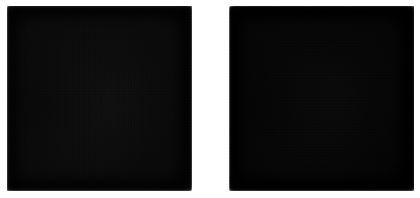

[[0.02439237 0.03966451 0.03121832 ... 0.03880692 0.03069276 0.03263184]
 [0.03285328 0.02950543 0.03333142 ... 0.02908128 0.03283888 0.03518242]
 [0.02448013 0.03658509 0.02784297 ... 0.03578287 0.02729514 0.02965263]
 ...
 [0.03307837 0.02967581 0.03363848 ... 0.02919605 0.03297696 0.03523773]
 [0.02462482 0.03656366 0.0278064  ... 0.0357098  0.02725473 0.02967367]
 [0.02965292 0.04074386 0.0353967  ... 0.03993478 0.03455821 0.03252536]]


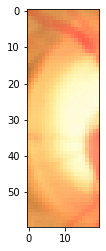

In [53]:
import numpy as np
import matplotlib.pyplot as plt
def plot_images(*images):
    images = list(images)
    n = len(images)
    fig, ax = plt.subplots(ncols=n, sharey=True)
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
    plt.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97)
    plt.show()
i = 0
plot_images(predict[i,:,:,0],predict[i,:,:,1])
plt.imshow(temp_img[0,100:160,140:160,:])
print(predict[0,100:160,140:160,0])
#print(np.where(predict[0,:,:,0]<0.03))